In [1]:
using Plots
using Printf
using LaTeXStrings
using Pkg
using DelimitedFiles
using Distributions
using RandomNumbers
using PoissonRandom


In [2]:
using Plots
using Printf
using LaTeXStrings
using LinearAlgebra
using Random

In [3]:

function contador_geiger(PD, N, d, RadType, tf, Z)
    ## PD: Probabilidad de detección
    ## N: Número de partículas
    ## d: Distancia de la muestra al contador.
    ## RadType: Tipo de radiación
    ## Z: Grosor de la muestra.
    contador = 0
    AC = 1.0  # Coeficiente de atenuación inicial 
    Random.seed!(50)
    if RadType == "gamma"
        AC = 0.0508  # Coeficiente de atenuación del aluminio para la radiación gamma.
    end
    
    if RadType == "beta"
        AC = 0.2 # Coeficiente de atenuación del aluminio para la radiación beta.
    end
    t = 0
    AT = exp(-AC * Z)
    
    while t < tf
        for _ in 1:N
            P = PD*(5/(4*d^1.48))  # Probabilidad de detección poner 1.4 mirar si es 100 !!!
            if rand() < P
                contador += 1
            end
        end
        t +=1 # Incrementar el tiempo de medición en cada iteración
    end

    if Z != 0
        contador = trunc(contador * AT)
    end
    
    return contador
end

contador_geiger (generic function with 1 method)

In [5]:
# Simular la detección durante 10 unidades de tiempo con una probabilidad del 20%, 1000 partículas emitidas, distancia de 2 metros y radiación gamma
P = 0.0003 # Probabilidad de detección
tf = 300  # Duración de la medición en unidades de tiempo 0.6
PE = 108474.07*0.94*0.84*10 # Número de partículas emitidas,94% que son bariom N en 200 las del segundo 0 decaen en bario 
d = 20  # Distancia en milimetros
Z = 0.51 # Grosor en milimetros
RadType = "gamma"  # Tipo de radiación

particulas_detectadas = 5*contador_geiger(P, PE, d, RadType, tf, Z)
println("Se detectaron ", particulas_detectadas, " partículas durante ", tf, " unidades de tiempo (radiación ", RadType, ").")
println(particulas_detectadas/tf, "conteo por segundo")

Se detectaron 5440.0 partículas durante 300 unidades de tiempo (radiación gamma).
18.133333333333333conteo por segundo


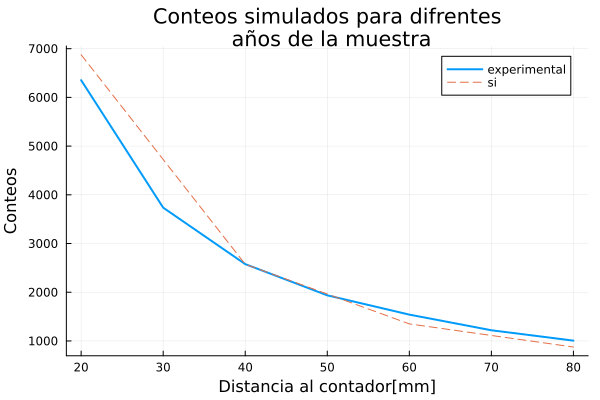

In [8]:
C0=[6353.,3736.,2577.,1936.,1540.,1219.,1006.]
Xp = 20:20:80
Cp = zeros(1,length(Xp))
for i in 1:length(Xp)
    Cp[1,i]= 5*contador_geiger(P,113436.45*10*0.94, Xp[i], RadType, tf, Z)
end
p = plot()
plot!(20:10:80,C0, label ="experimental",linewidth=2)
plot!(Xp,Cp[1,1:end],linestyle=:dash,linewidth=1,label= "si")

title!("Conteos simulados para difrentes\n años de la muestra")
yaxis!("Conteos")
xaxis!("Distancia al contador[mm]")
plot!(legend= true)

In [21]:
Activity=[197585.5,116173.93,113617.47,111042.4,108474.07,105995.75,103556.87,63808.77]
X1 = 20:6:80
C1 = zeros(length(Activity),length(X1))
C0=[6353.,3736.,2577.,1936.,1540.,1219.,1006.]
for i in 1:7
    C0[i]=C0[i]./(1-C0[i]*2.5e-8)
end
for j in 1:length(Activity)
	for i in 1:length(X1)
		C1[j,i]= 5*contador_geiger(P, Activity[j]*10*0.94, X1[i], RadType, tf, Z)
	end
end
C1

8×11 Matrix{Float64}:
 12245.0  8525.0  6250.0  4805.0  3810.0  …  2300.0  1995.0  1775.0  1580.0
  7060.0  4870.0  3595.0  2830.0  2265.0     1330.0  1140.0  1025.0   895.0
  6890.0  4760.0  3515.0  2770.0  2215.0     1300.0  1115.0  1005.0   875.0
  6695.0  4625.0  3420.0  2700.0  2170.0     1270.0  1100.0   990.0   860.0
  6490.0  4475.0  3320.0  2620.0  2100.0     1235.0  1075.0   970.0   845.0
  6335.0  4380.0  3275.0  2580.0  2080.0  …  1220.0  1060.0   960.0   835.0
  6185.0  4265.0  3185.0  2495.0  2010.0     1190.0  1030.0   940.0   810.0
  3815.0  2620.0  1945.0  1530.0  1210.0      710.0   610.0   565.0   485.0

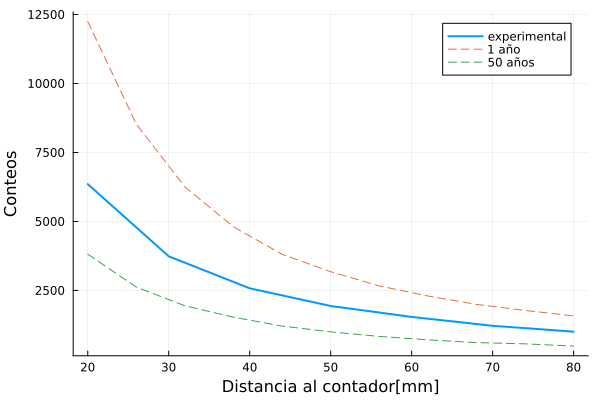

In [25]:
p = plot()
plot!(20:10:80,C0, label ="experimental",linewidth=2)
label=["1 año","50 años"]
j=1
for i in [1,8]
    plot!(X1,C1[i,1:end],linestyle=:dash,linewidth=1,label= label[j])
    j+=1
end
# title!("Conteos simulados para difrentes\n años de la muestra")
yaxis!("Conteos")
xaxis!("Distancia al contador[mm]")
plot!(legend= true)
savefig("1a50a.png")


In [27]:
p = plot()
plot!(20:10:80,C0, label ="experimental",linewidth=2)
label=["24años","25años","26años","27años","28años","29años"]
for i in 2:length(Activity)-1
    plot!(X1,C1[i,1:end],linestyle=:dash,linewidth=1,label=label[i-1])
end
# title!("Conteos simulados para difrentes\n años de la muestra")
yaxis!("Conteos")
xaxis!("Distancia al contador[mm]")
plot!(legend=true)
savefig("comparacion.png")


"c:\\Users\\juans_mphdqn7\\Desktop\\UNAL\\Fisica\\Subatomica\\comparacion.png"